In [1]:


# convolutional neural network from

# Nitish_Gangwar     06 Oct, 2021 
# Applying Convolutional Neural Network on mnist dataset
# https://www.geeksforgeeks.org/applying-convolutional-neural-network-on-mnist-dataset/


# multilayer perceptron example from:
# https://valueml.com/multi-layer-perceptron-by-keras-with-example/
# Value ML    Riya Thakore  


import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import np_utils
from keras import backend as k

# Load MNIST data from keras, try an elaborate convolutional neural network,
# fall back on single-layer neural network from a different example when
# the loss function doesn't evaluate correctly.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
img_rows, img_cols=28, 28
 
if k.image_data_format() == 'channels_first':
   print("channels first")
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpsize = (1, img_rows, img_cols)
 
else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpsize = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train = (x_train/255) 
x_test  = (x_test/255) 
Xflat = x_train.reshape((-1,28*28))
Xflat_test = x_test.reshape((-1,28*28))

In [4]:
x_train.shape, Xflat.shape

((60000, 28, 28, 1), (60000, 784))

In [5]:
y_train_hot = keras.utils.np_utils.to_categorical(y_train)
y_test_hot = keras.utils.np_utils.to_categorical(y_test)

In [6]:
y_train_hot[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
inpx = Input(shape=inpsize)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [9]:
x_train.shape, y_train_hot.shape, inpsize


((60000, 28, 28, 1), (60000, 10), (28, 28, 1))

In [10]:
y_train_hot[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
inpx.shape, x_train.shape, y_train_hot.shape

(TensorShape([None, 28, 28, 1]), (60000, 28, 28, 1), (60000, 10))

In [14]:
model = Model([inpx], layer7)
model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])
 
model.fit(x_train, y_train_hot, epochs=10, batch_size=500)

Epoch 1/10
120/120 [==============================] - 128s 1s/step - loss: 0.1160 - accuracy: 0.9667
Epoch 2/10
120/120 [==============================] - 131s 1s/step - loss: 0.0726 - accuracy: 0.9790
Epoch 3/10
120/120 [==============================] - 132s 1s/step - loss: 0.0545 - accuracy: 0.9839
Epoch 4/10
120/120 [==============================] - 137s 1s/step - loss: 0.0430 - accuracy: 0.9882
Epoch 5/10
120/120 [==============================] - 136s 1s/step - loss: 0.0364 - accuracy: 0.9895
Epoch 6/10
120/120 [==============================] - 140s 1s/step - loss: 0.0315 - accuracy: 0.9908
Epoch 7/10
120/120 [==============================] - 136s 1s/step - loss: 0.0284 - accuracy: 0.9918
Epoch 8/10
120/120 [==============================] - 146s 1s/step - loss: 0.0234 - accuracy: 0.9933
Epoch 9/10
120/120 [==============================] - 130s 1s/step - loss: 0.0209 - accuracy: 0.9942
Epoch 10/10
120/120 [==============================] - 129s 1s/step - loss: 0.0189 - accura

In [15]:
ypred = model.predict(x_test)
print(ypred.shape)

(10000, 10)


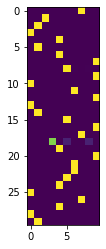

In [16]:
import matplotlib.pyplot as plt
plt.imshow(ypred[0:30,0:10])

In [17]:
score = model.evaluate(x_test, y_test_hot, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.024149591103196144
accuracy= 0.9916999936103821


In [25]:
inpx = Input(shape=x_train.shape[1:])
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [26]:
model = Model([inpx], layer7)
model.compile(optimizer="Adadelta",
              loss="categorical_crossentropy",
              metrics=['accuracy'])
 
model.fit(x_train, y_train_hot, epochs=1, batch_size=500)

  5/120 [>.............................] - ETA: 2:20 - loss: 2.4901 - accuracy: 0.0912

KeyboardInterrupt: ignored

In [27]:
y_train_hot.shape

(60000, 10)

In [58]:
Xflat.shape

(60000, 784)

In [58]:
# https://valueml.com/multi-layer-perceptron-by-keras-with-example/
# Value ML    Riya Thakore  
from keras.models import Sequential

In [64]:
modelsimple = Sequential()
modelsimple.add(Dense(212, input_shape=(Xflat.shape[1],), activation='relu'))
modelsimple.add(Dense(268, activation='relu'))
modelsimple.add(Dense(10, activation='softmax'))

In [60]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [61]:
Xflat.shape, Xflat_test.shape

((60000, 784), (10000, 784))

In [62]:
Xflat.shape, y_train_hot.shape

((60000, 784), (60000, 10))

In [65]:
modelsimple.compile(optimizer='adam',loss="categorical_crossentropy" , metrics=['accuracy'])
modelsimple.fit(Xflat, y_train_hot, epochs=1)

1875/1875 [==============================] - 11s 5ms/step - loss: 0.6650 - accuracy: 0.7932


In [21]:
predictsimple = modelsimple.predict(Xflat_test)
predictsimple.shape

(10000, 10)

In [22]:
predictsimple[0,:]

array([3.1362589e-08, 2.4093279e-07, 3.6867743e-06, 3.7302866e-04,
       1.6836098e-10, 8.5320515e-08, 8.9053608e-12, 9.9958688e-01,
       1.3343389e-07, 3.5960871e-05], dtype=float32)

In [23]:
Xflat_test.shape, y_test_hot.shape, predictsimple.shape

((10000, 784), (10000, 10), (10000, 10))

In [25]:
scoresimple = modelsimple.evaluate(Xflat_test, y_test_hot, verbose=1)
scoresimple

313/313 [==============================] - 2s 8ms/step - loss: 0.1074 - accuracy: 0.9648


[0.10739640891551971, 0.9648000001907349]

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predictsimple, y_test_hot)

ValueError: ignored

In [27]:
predictsimple

array([[3.1362589e-08, 2.4093279e-07, 3.6867743e-06, ..., 9.9958688e-01,
        1.3343389e-07, 3.5960871e-05],
       [4.9998516e-08, 1.6063052e-05, 9.9980658e-01, ..., 3.7843995e-07,
        8.2650813e-06, 4.7339493e-10],
       [3.9513441e-05, 9.7962689e-01, 3.2288618e-03, ..., 1.2599110e-02,
        3.1246860e-03, 6.5316483e-05],
       ...,
       [8.9271008e-09, 3.5300718e-07, 9.9495445e-08, ..., 5.7461086e-05,
        1.3112112e-05, 3.3539648e-03],
       [1.1837237e-05, 4.8773543e-08, 6.0276852e-07, ..., 6.6895191e-06,
        1.6089088e-04, 2.3406335e-06],
       [6.7699645e-08, 1.9758750e-10, 7.9260850e-08, ..., 1.0072629e-10,
        2.1860571e-07, 1.1787024e-09]], dtype=float32)

In [40]:
call = np.equal(predictsimple ,np.dot(np.ones((10,1)) , predictsimple.max(axis=1)[np.newaxis,:] ).T )
call

array([[False, False, False, ...,  True, False, False],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [41]:
confusion_matrix(call, y_test_hot)

ValueError: ignored

In [42]:
# ValueError: multilabel-indicator is not supported ... 
# Stackoverflow....
# https://stackoverflow.com/questions/46953967/multilabel-indicator-is-not-supported-for-confusion-matrix
# Have to use argmax... 

confusion_matrix(call.argmax(axis=1), y_test_hot.argmax(axis=1))

array([[ 971,    0,    4,    0,    1,    3,    6,    2,    5,    4],
       [   0, 1110,    0,    0,    2,    0,    2,    1,    0,    2],
       [   3,    4, 1003,    7,    8,    0,    1,   12,    8,    1],
       [   2,    6,    9,  995,    0,   32,    1,    8,   37,   14],
       [   0,    0,    1,    0,  920,    0,    3,    0,    1,    1],
       [   0,    1,    0,    3,    0,  850,    8,    0,   17,    7],
       [   2,    5,    2,    0,    5,    4,  936,    0,    5,    0],
       [   0,    3,    8,    3,    5,    0,    1,  994,    5,    3],
       [   2,    6,    5,    2,    1,    2,    0,    1,  894,    2],
       [   0,    0,    0,    0,   40,    1,    0,   10,    2,  975]])

In [28]:
y_test_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
scoresimple

[2.612765073776245, 0.0982000008225441]

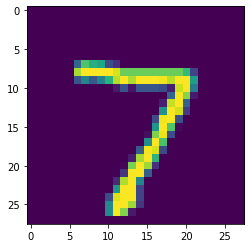

In [30]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0,:,:,0])